<a href="https://colab.research.google.com/github/yh08037/ABR-Lab-Summer-Project/blob/master/CIFAR10_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imoprt Fastai libraries

In [0]:
from fastai import *
from fastai.vision import *

## Hyperparameters

In [0]:
bs = 64        # batch size
img_size = 32  # image size

## Getting the Dataset

In [0]:
path = untar_data(URLs.CIFAR); path

PosixPath('/root/.fastai/data/cifar10')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

## Creating an Image Data Bunch

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=img_size, bs=bs)

In [0]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
cat,cat,cat,cat,cat
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
cat,cat,cat,cat,cat
Path: /root/.fastai/data/cifar10;

Test: None

## Visualising our data

In [0]:
print(data.classes)
len(data.classes), data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

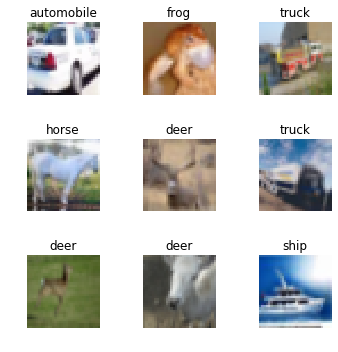

In [0]:
data.show_batch(rows = 3, figsize=(5, 5))

## Training our Model

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 91597670.45it/s]


In [0]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7fd6a9098d08>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


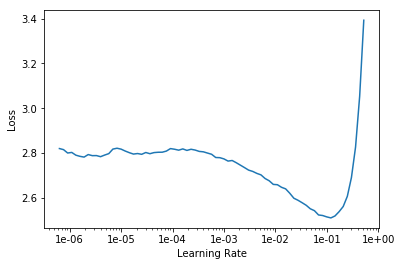

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)  # choose learning rate with maximum declining slope
learn.save('stage-1')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,1.611602,1.436224,0.481600,01:41
1,1.330619,1.182431,0.573200,01:40
2,1.193653,1.090821,0.606300,01:40
3,1.155647,1.081662,0.616200,01:40


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


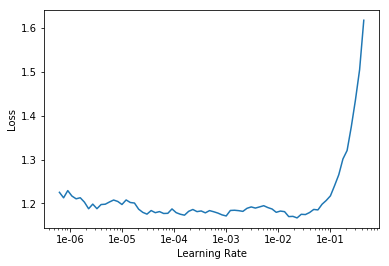

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-03))  # choose learning rate with maximum declining slope
learn.save('stage-2')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,1.151497,1.061000,0.621100,01:42
1,1.124029,1.023731,0.636000,01:41
2,1.092411,1.002666,0.648300,01:40
3,1.075055,0.999075,0.643800,01:40
4,1.058446,0.983667,0.651600,01:39


In [0]:
learn.fit_one_cycle(10) 
learn.save('stage-3')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,1.062355,0.977753,0.657500,01:39
1,1.064344,0.957646,0.660400,01:40
2,1.031535,0.946419,0.661600,01:41
3,1.007754,0.926869,0.670400,01:39
4,0.982397,0.866333,0.689800,01:39
5,0.959885,0.856892,0.696800,01:38
6,0.916419,0.830519,0.703100,01:39
7,0.911302,0.831095,0.698400,01:40
8,0.869888,0.818047,0.703900,01:42
9,0.866752,0.828163,0.703200,01:42


In [0]:
learn.fit_one_cycle(10) 
learn.save('stage-4')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.879922,0.815395,0.708000,01:39
1,0.912066,0.830796,0.699900,01:41
2,0.904606,0.836801,0.702200,01:40
3,0.918244,0.820570,0.710200,01:40
4,0.879991,0.804630,0.715800,01:42
5,0.854532,0.786303,0.723500,01:42
6,0.853416,0.795334,0.719000,01:42
7,0.824352,0.780112,0.723800,01:41
8,0.834029,0.766597,0.729800,01:41
9,0.802647,0.776387,0.727100,01:42


In [0]:
learn.fit_one_cycle(10) 
learn.save('stage-5')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.840915,0.781681,0.724700,01:40
1,0.830913,0.780680,0.721900,01:40
2,0.855682,0.754143,0.735600,01:39
3,0.847923,0.783477,0.725800,01:39
4,0.814433,0.753888,0.734200,01:40
5,0.810608,0.749997,0.734900,01:41
6,0.808113,0.747761,0.736500,01:38
7,0.780334,0.732615,0.739600,01:38
8,0.763496,0.729192,0.742500,01:39
9,0.780230,0.729224,0.743100,01:42


In [0]:
learn.fit_one_cycle(10) 
learn.save('stage-6')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.772697,0.736519,0.740600,01:41
1,0.781030,0.742463,0.740600,01:40
2,0.806725,0.737804,0.738300,01:41
3,0.818899,0.736174,0.740600,01:42
4,0.785782,0.734911,0.744000,01:44
5,0.777145,0.723663,0.746100,01:42
6,0.760716,0.725843,0.744900,01:42
7,0.766394,0.715458,0.746200,01:42
8,0.744888,0.709380,0.748200,01:41
9,0.738426,0.701632,0.751600,01:39


In [0]:
learn.fit_one_cycle(10) 
learn.save('stage-7')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.752479,0.719576,0.746600,01:39
1,0.787833,0.718609,0.748500,01:39
2,0.778670,0.742786,0.741300,01:39
3,0.790536,0.734371,0.745800,01:39
4,0.782568,0.719314,0.752400,01:38
5,0.758828,0.704848,0.753500,01:37
6,0.757954,0.711459,0.752700,01:37
7,0.739951,0.699455,0.754800,01:40
8,0.712241,0.704505,0.753900,01:39
9,0.717526,0.688152,0.758000,01:38


In [0]:
learn.fit_one_cycle(30) 
learn.save('stage-8')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.730687,0.695994,0.757400,01:38
1,0.731861,0.690191,0.757200,01:38
2,0.726976,0.703602,0.754600,01:38
3,0.736154,0.699259,0.757100,01:39
4,0.740010,0.692019,0.759000,01:37
5,0.762726,0.707376,0.750300,01:37
6,0.747707,0.708495,0.750500,01:37
7,0.780127,0.697240,0.755300,01:37
8,0.763043,0.713198,0.750300,01:37
9,0.777756,0.702171,0.756100,01:38


In [36]:
learn.fit_one_cycle(10) 
learn.save('stage-9')  # saving model weights

epoch,train_loss,valid_loss,accuracy,time
0,0.680058,0.655137,0.770600,01:39
1,0.710211,0.667369,0.767000,01:38
2,0.734081,0.664736,0.769900,01:37
3,0.741398,0.692100,0.759200,01:37
4,0.733376,0.674567,0.762300,01:37
5,0.691910,0.667717,0.761100,01:37
6,0.678038,0.664215,0.766900,01:37
7,0.674266,0.657470,0.768900,01:38
8,0.680675,0.652365,0.771000,01:39
9,0.663122,0.651919,0.770300,01:38


## Evaluating our Model

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [38]:
output = interp.confusion_matrix()
accuracy = output.trace() / output.sum()
print('Accuracy :', accuracy)

Accuracy : 0.7703


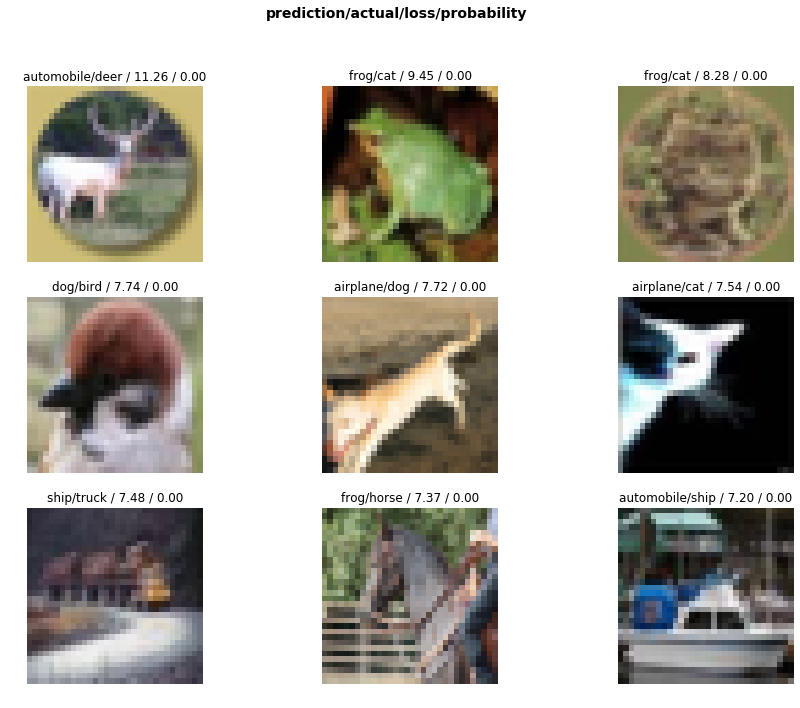

In [33]:
interp.plot_top_losses(9, figsize=(15, 11))

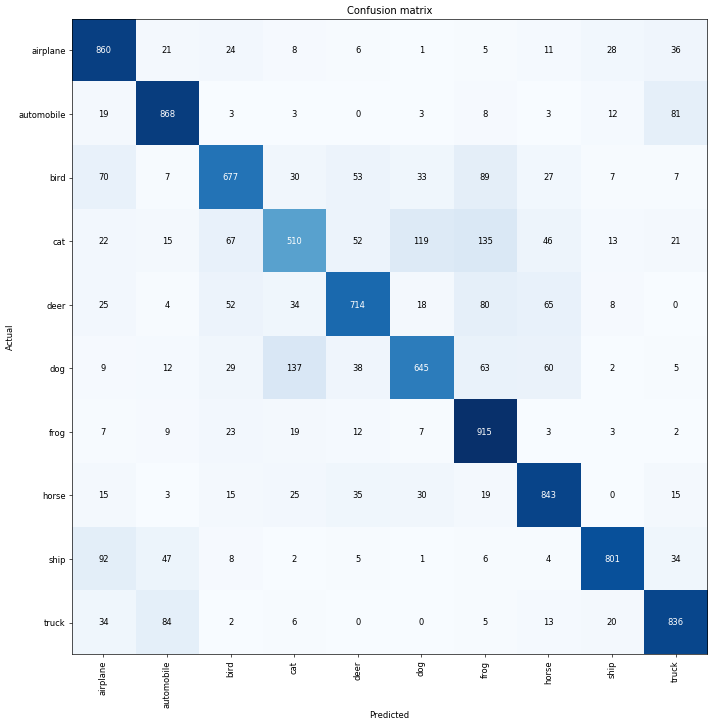

In [34]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [35]:
interp.most_confused(min_val=2)

[('dog', 'cat', 137),
 ('cat', 'frog', 135),
 ('cat', 'dog', 119),
 ('ship', 'airplane', 92),
 ('bird', 'frog', 89),
 ('truck', 'automobile', 84),
 ('automobile', 'truck', 81),
 ('deer', 'frog', 80),
 ('bird', 'airplane', 70),
 ('cat', 'bird', 67),
 ('deer', 'horse', 65),
 ('dog', 'frog', 63),
 ('dog', 'horse', 60),
 ('bird', 'deer', 53),
 ('cat', 'deer', 52),
 ('deer', 'bird', 52),
 ('ship', 'automobile', 47),
 ('cat', 'horse', 46),
 ('dog', 'deer', 38),
 ('airplane', 'truck', 36),
 ('horse', 'deer', 35),
 ('deer', 'cat', 34),
 ('ship', 'truck', 34),
 ('truck', 'airplane', 34),
 ('bird', 'dog', 33),
 ('bird', 'cat', 30),
 ('horse', 'dog', 30),
 ('dog', 'bird', 29),
 ('airplane', 'ship', 28),
 ('bird', 'horse', 27),
 ('deer', 'airplane', 25),
 ('horse', 'cat', 25),
 ('airplane', 'bird', 24),
 ('frog', 'bird', 23),
 ('cat', 'airplane', 22),
 ('airplane', 'automobile', 21),
 ('cat', 'truck', 21),
 ('truck', 'ship', 20),
 ('automobile', 'airplane', 19),
 ('frog', 'cat', 19),
 ('horse', 'f